<h1><center><font color=red>Rapport Projet Data Mining: </center></h1><br>
<h2><center> Realization of a web application for the automatic text summary </center></h2>
<h3><center><font color=blue> Automatic Text Summarization and Categorization </center><h3>

# Realized by:
--------------------------------------------
- **Mohamed EZ-ZZAALYOUY**
--------------------------------------------


<h1>Introduction</h1>
Summarization is the task of condensing a piece of text to a shorter version, reducing the size of the initial text while at the same time preserving key informational elements and the meaning of content. Since manual text summarization is a time expensive and generally laborious task, the automatization of the task is gaining increasing popularity and therefore constitutes a strong motivation for academic research. Automatic text summarization is a common problem in machine learning and natural language processing (NLP).


<h1>Natural Language Processing (NLP)</h1>
Natural Language Processing is the technology used to aid computers to understand the human’s natural language. It’s not an easy task teaching machines to understand how we communicate. Natural Language Processing which usually shortened as NLP, is a branch of artificial intelligence that deals with the interaction between computers and humans using the natural language. The ultimate objective of NLP is to read, decipher, understand, and make sense of the human languages in a manner that is valuable.


# Step [1]: Prepare libraries and data
### [1.1] Include important libraries

In [ ]:
import nltk
import re
import heapq  
import pickle
import pandas as pd
import numpy as np
from string import punctuation
from nltk.corpus import stopwords
punctuation = punctuation + '\n'
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

### [1.2] Text categories:

<h1>Getting Text Category</h1>
Here we have alot of works to do for extract the features from that text for use that features in classification algorithms. And in this section, we start to talk about text cleaning since most of urls or texts contain a lot of noise, and after that we will pass the cleaned text to TF-IDF vectorizer to prepare it to classification model. Getting cate gory process explained in the following diagram:


In [ ]:
categories = ['Economy & Business', 'Diverse News', 'Politic', 'Sport', 'Technology']

### [1.3] Building the summerizer:

In [ ]:
def nltk_summarizer(input_text, number_of_sentence):
    stopWords = set(nltk.corpus.stopwords.words("arabic") + nltk.corpus.stopwords.words("english"))
    word_frequencies = {}  
    for word in nltk.word_tokenize(input_text):  
        if word not in stopWords:
            if word not in punctuation:
                if word not in word_frequencies.keys():
                    word_frequencies[word] = 1
                else:
                    word_frequencies[word] += 1

    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

    sentence_list = nltk.sent_tokenize(input_text)
    sentence_scores = {}  
    for sent in sentence_list:  
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]

    summary_sentences = heapq.nlargest(number_of_sentence, sentence_scores, key=sentence_scores.get)

    summary = ' '.join(summary_sentences)  
    return summary

### [1.4] Reading dataset file:

In [ ]:
en_data = pd.read_csv(r"dataset/bbc_news_dataset.csv")
en_data = en_data.replace("entertainment", "diverse news")
en_data = en_data.replace("business", "economy & business")

ar_data = pd.read_csv(r"dataset/arabic_dataset.csv")
ar_data = ar_data.replace("diverse", "diverse news")
ar_data = ar_data.replace("culture", "diverse news")
ar_data = ar_data.replace("politic", "politics")
ar_data = ar_data.replace("technology", "tech")
ar_data = ar_data.replace("economy", "economy & business")
ar_data = ar_data.replace("internationalNews", "politics")
ar_data = ar_data[~ar_data['type'].str.contains('localnews')]
ar_data = ar_data[~ar_data['type'].str.contains('society')]
en_data.sample(10)

,ArticleId,Text,Category
23,1617,ferguson urges henry punishment sir alex fergu...,sport
279,352,new consoles promise big problems making games...,tech
1403,595,roche turns down federer offer australian te...,sport
623,552,casino royale is next bond movie casino royale...,diverse news
33,2100,security papers found in street an inquiry i...,politics
866,1903,labour trio had vote-rig factory three labou...,politics
396,1401,be careful how you code a new european directi...,tech
590,1896,parmalat to return to stockmarket parmalat th...,economy & business
511,108,lit idol begins search for author the second p...,diverse news
1151,969,o leary agrees new villa contract aston villa ...,sport


In [ ]:
ar_data.sample(10)

,Unnamed: 0,text,type
722,123,\nنفى اليوم الخميس المدير العام للمعهد الوطني ...,economy & business
1975,1048,\nعين الملك المغربي محمد السادس اليوم الجمعة س...,politics
953,26,\nأبطلت محكمة فدرالية أمريكية طلبا عاجلا تقدمت...,politics
3184,260,\nبرمج الإطار الفني للنجم الرياضي الساحلي مقاب...,sport
3128,204,\nيستأنف كل من الحارس ماجد حمزة و محمد صفر نشا...,sport
1531,604,\nتوفي ثلاثة أشخاص، وأصيب 4 آخرون، في حصيلة أو...,politics
1666,739,"\nوجه الرئيس الأمريكي المنتخب ""دونالد ترامب"" ا...",politics
1184,257,\nحذرت السفارة الأمريكية كافة رعاياها في الممل...,politics
2673,491,\nأفادت مصادر من داخل حركة نداء تونس، الأحد بس...,politics
337,213,\nحدث مؤخرا انفجار هائل في أنابيب المياه تحت ا...,diverse news


# Step [2]: Data sterilization
##<h1>Text Cleaning and Pre-processing</h1>
In Natural Language Processing (NLP), most of the text and documents contain many words that are redundant for text classification, such as stopwords, miss-spellings, slangs, and etc. In this section, we briefly explain some techniques and methods for text cleaning and pre-processing text documents. In many algorithms like statistical and probabilistic learning methods, noise and unnecessary features can negatively affect the overall perfomance. So, elimination of these features are extremely important.
### [2.1] Delete links:
This will remove all links from the text and it's include the following:
- Matches http protocols like [**http:// or https://**].
- Match optional whitespaces after http protocols.
- Optionally matches including the [**www.**] or not.
- Optionally matches whitespaces in the links.
- Matches 0 or more of one or more word characters followed by a period.
- Matches 0 or more of one or more words (or a dash or a space) followed by [**\\**].
- Any remaining path at the end of the url followed by an optional ending.
- Matches ending query params (even with white spaces, etc).

In [ ]:
def delete_links(input_text):
    pettern  = r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
    out_text = re.sub(pettern, ' ', input_text)
    return out_text

### [2.2] Fixing word lengthening:
Word lengthening occurs when characters are wrongly repeated. English words have a max of two repeated characters like the words [**wood, school**]. Additional characters need to ripped off, otherwise we might add misleading information.

In [ ]:
def delete_repeated_characters(input_text):
    pattern  = r'(.)\1{2,}'
    out_text = re.sub(pattern, r"\1\1", input_text)
    return out_text

In [ ]:
def replace_letters(input_text):
    replace = {"أ": "ا","ة": "ه","إ": "ا","آ": "ا","": ""}
    replace = dict((re.escape(k), v) for k, v in replace.items()) 
    pattern = re.compile("|".join(replace.keys()))
    out_text = pattern.sub(lambda m: replace[re.escape(m.group(0))], input_text)
    return out_text

### [2.3] Delete bad symbols:
#### Delete Bad Symbols & Stopwords
Another issue of text cleaning as a pre-processing step is noise removal. Text documents generally contains characters like punctuations or special characters and they are not necessary for text mining or classification purposes. Although punctuation is critical to understand the meaning of the sentence, but it can affect the classification algorithms negatively.
- Example of bad symbols ``` /(){}\[\]|@âÂ,;\?\'\"\*…؟–’،!&\+-:؛- ```
- Also remove arabic text vowelization.
- Stopwords like prepositions and hyphens words. for example ``` and, in, or, etc.



In [ ]:
#This method removes unwanted characters from the text, such as question marks, commas, star, plus ...etc.
def clean_text(input_text):
    replace = r'[/(){}\[\]|@âÂ,;\?\'\"\*…؟–’،!&\+-:؛-]'
    out_text = re.sub(replace, " ", input_text)
    words = nltk.word_tokenize(out_text)
    words = [word for word in words if word.isalpha()]
    out_text = ' '.join(words)
    return out_text

In [ ]:
def remove_vowelization(input_text):
    vowelization = re.compile(""" ّ|َ|ً|ُ|ٌ|ِ|ٍ|ْ|ـ""", re.VERBOSE)
    out_text = re.sub(vowelization, '', input_text)
    return out_text

### [2.4] Delete stopwords:
Like prepositions and hyphens words. for example [**and, in, or ...etc**].

In [ ]:
def delete_stopwords(input_text):
    stop_words = set(nltk.corpus.stopwords.words("arabic") + nltk.corpus.stopwords.words("english"))
    tokenizer = nltk.tokenize.WhitespaceTokenizer()
    tokens = tokenizer.tokenize(input_text)
    wnl = nltk.WordNetLemmatizer()
    lemmatizedTokens =[wnl.lemmatize(t) for t in tokens]
    out_text = [w for w in lemmatizedTokens if not w in stop_words]
    out_text = ' '.join(out_text)
    return out_text

In [ ]:
def stem_text(input_text):
    st = ISRIStemmer()
    tokenizer = nltk.tokenize.WhitespaceTokenizer()
    tokens = tokenizer.tokenize(input_text)
    out_text = [st.stem(w) for w in tokens]
    out_text = ' '.join(out_text)
    return out_text

### [2.5] Text prepare:
- Applay all previus functions to sterilize the input text.
- Convert letters to lowercase to make all words in the text in the same letters sensitivity.

In [ ]:
def text_prepare(input_text, ar_text):
    out_text = delete_links(input_text)
    out_text = delete_repeated_characters(out_text)
    out_text = clean_text(out_text)
    out_text = delete_stopwords(out_text)
    if ar_text:
        out_text = replace_letters(out_text)
        out_text = remove_vowelization(out_text)
        out_text = stem_text(out_text)
    else:
        out_text = out_text.lower()
    return out_text

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
en_data['Processed Text'] = en_data['Text'].apply(text_prepare, args=(False,))
ar_data['Processed Text'] = ar_data['text'].apply(text_prepare, args=(True,))
en_data.sample(10)

,ArticleId,Text,Category,Processed Text
116,1745,brown to outline presidency goals next year wi...,politics,brown outline presidency goal next year make b...
1329,1651,brown s poll campaign move denied the governme...,politics,brown poll campaign move denied government ha ...
1208,2080,holmes starts 2005 with gb events kelly holmes...,sport,holmes start gb event kelly holmes start serie...
306,1499,man city 0-2 man utd manchester united reduced...,sport,man city man utd manchester united reduced che...
171,1645,spirit awards hail sideways the comedy sideway...,diverse news,spirit award hail sideways comedy sideways ha ...
51,527,mourinho defiant on chelsea form chelsea boss ...,sport,mourinho defiant chelsea form chelsea bos jose...
526,2223,rem announce new glasgow concert us band rem h...,diverse news,rem announce new glasgow concert u band rem an...
474,1946,brazil approves bankruptcy reform a major refo...,economy & business,brazil approves bankruptcy reform major reform...
162,1596,no charges against tv s cosby us comedian bill...,diverse news,charge tv cosby u comedian bill cosby face cha...
1206,522,bt offers free net phone calls bt is offering ...,tech,bt offer free net phone call bt offering custo...


In [ ]:
ar_data.sample(10)

,Unnamed: 0,text,type,Processed Text
1095,168,\nأطلق اليوم الجمعة مجهولون النار على حافلة تق...,politics,طلق اليوم جمع جهل نار حفل تقل قبط كان طرق حفظ ...
4211,1287,\nتمكن اللاعب التونسي مالك الجزيري من العودة إ...,sport,تمك لعب ونس الك جزر عود ندي خمس صنف علم اعب تن...
2156,1229,\nلقي عدة أشخاص مصرعهم اليوم الأربعاء حين صدمت...,politics,لقي عده شخص صرع اليوم ربعاء صدم سير جمع يشر زا...
4290,1366,\nأكدت وزيرة شؤون الشباب والرياضة ماجدولين الش...,sport,اكد وزر شؤن شبب ريض ماجدول شار خلل جلس جمع الي...
1245,318,\nطالبت وزارة الخارجية المصرية اليوم الأحد الح...,politics,طلب وزر خرج صره اليوم احد حكم يطل حقق وفه وطن ...
933,6,\nأعلنت السلطات الإيطالية أمس الأحد 8 نوفمبر 2...,politics,اعل سلط يطل احد عقل قيد ونس نظم دعش رهب سعى دخ...
2686,504,\nنفى عضو الهيئة السياسية لحزب نداء تونس، فوزي...,politics,نفى عضو هيئ سيس حزب ندء ونس فوز لوم وجد فسد دخ...
2278,96,\nيؤدّي وزير أوروبا والشؤون الخارجية للجمهورية...,politics,وزر ورب شؤن خرج جمهور جون ايف ودر زير عمل ونس ...
420,296,\nأثارت صورة لشرطيين أمريكيين الكثير من الجدل ...,diverse news,ثرت صور شرط امر كثر جدل نكر رود وقع وصل جمع ظه...
4429,49,\nطوّر موقع غوغل خدمة جديدة، ستساعد مستعملي تط...,tech,وقع غوغل خدم جدد سعد عمل طبق خرط غوغل ماب كان ...


# Step [3]: Text Splitting and vectorizing
### [3.1] Label encoding:

In [ ]:
en_label_encoder = LabelEncoder()
en_data['Category Encoded'] = en_label_encoder.fit_transform(en_data['Category'])

ar_label_encoder = LabelEncoder()
ar_data['Category Encoded'] = ar_label_encoder.fit_transform(ar_data['type'])
ar_data['Category Encoded'] = ar_data['Category Encoded'].replace(1, 0)
ar_data['Category Encoded'] = ar_data['Category Encoded'].replace(0, 1)

en_data.sample(10)

,ArticleId,Text,Category,Processed Text,Category Encoded
490,1182,apple unveils low-cost mac mini apple has un...,tech,apple unveils low cost mac mini apple ha unvei...,4
159,1919,uk tv channel rapped for csi ad tv channel fiv...,diverse news,uk tv channel rapped csi ad tv channel five ha...,0
543,2204,profile: david miliband david miliband s rapid...,politics,profile david miliband david miliband rapid ri...,2
866,1903,labour trio had vote-rig factory three labou...,politics,labour trio vote rig factory three labour coun...,2
285,78,hodgson relishes european clashes former black...,sport,hodgson relish european clash former blackburn...,3
1443,1490,unclear future for striker baros liverpool for...,sport,unclear future striker baros liverpool forward...,3
708,18,connors boost for british tennis former world ...,sport,connors boost british tennis former world numb...,3
452,1045,domain system scam fear a system to make it ea...,tech,domain system scam fear system make easier cre...,4
943,1633,edu blasts arsenal arsenal s brazilian midfiel...,sport,edu blast arsenal arsenal brazilian midfielder...,3
1248,1095,gold falls on imf sale concerns the price of g...,economy & business,gold fall imf sale concern price gold ha falle...,1


In [ ]:
ar_data.sample(10)

,Unnamed: 0,text,type,Processed Text,Category Encoded
1664,737,\nوصف اليوم الأحد الرئيس الأميركي دونالد ترامب...,politics,وصف اليوم احد رئس امر دونالد رمب حزب الل حمس ر...,2
2792,610,\nوجه رئيس الجمهورية المؤقت، محمد المنصف المرز...,politics,وجه رئس جمهور ؤقت حمد نصف رزق برق عزه رئس لبن ...,2
1954,1027,\nلقي 4 عناصر من الشرطة المصرية حتفهم اليوم ال...,politics,لقي عنصر شرط صره حتف اليوم جمع اصب اخر فجر عبه...,2
1018,91,\nأعلنت وزارة الدفاع الجزائرية أنه تم يوم أمس ...,politics,اعل وزر دفع جزر انه تم يوم حجز رمل يحي ودا معد...,2
3085,161,\nتوج نادي ساقية الزيت بالبطولة العربية للاندي...,sport,توج ندي سقي زيت بطل عرب ديه لول مره ارخ فوز ال...,3
601,2,\nأكدت وزارة الطاقة والمناجم والطاقات المتجددة...,economy & business,اكد وزر طقه نجم طاق تجدد ناج نفط غاز حقل واجد ...,1
261,137,\nنجح فريق طبي في فصل توأم سوداني بإحدى مستشفي...,diverse news,نجح فرق طبي فصل توم سود حدى شفي سعد عمل جرح غر...,1
3762,838,\nتنطلق اليوم الاثنين عملية بيع التذاكر الخاصة...,sport,طلق اليوم اثن عمل بيع ذكر خصه بار ونس غين حسب ...,3
1838,911,\nقتل طفل و أصيب 7 آخرون بجروح متفاوتة الخطورة...,politics,قتل طفل اصب اخر جرح تفو خطر فجر عبه نسف اليوم ...,2
4419,39,"\nاعترف تيم كوك الرئيس التنفيذي لشركة ""أبل"" ول...",tech,عرف تيم كوك رئس نفذ لشر ابل لول مره رفع سعر هت...,4


### [3.2] Splitting the data to train and text:

In [ ]:
en_X_train, en_X_test, en_y_train, en_y_test = train_test_split(en_data['Processed Text'], en_data['Category Encoded'], test_size=0.2, random_state=0)
ar_X_train, ar_X_test, ar_y_train, ar_y_test = train_test_split(ar_data['Processed Text'], ar_data['Category Encoded'], test_size=0.2, random_state=0)

### [3.3] TF-IDF vectorizer:
The second approach extends the bag-of-words framework by taking into account total frequencies of words in the corpora. It helps to penalize too frequent words and provide better features space. 

In [ ]:
def tfidf_features(X_train, X_test, ngram_range):
    tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, ngram_range))
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    return X_train, X_test

In [ ]:
en_features_train, en_features_test = tfidf_features(en_X_train, en_X_test, 2)

In [ ]:
ar_features_train, ar_features_test = tfidf_features(ar_X_train, ar_X_test, 2)

### [3.4] Fit model:
## Predict the correct category using pre-trained models
We have trained 6 different models for both Arabic and English datasets and all of these models are built into sklearn library, these models give me a high degree of accuracy for data classification.


In [ ]:
# This function used to generate a model based on it's name then train that model and calculate it's accuracy on test data.
def fit_model(model_name, ar_text=False):
    if model_name == 'ridge_model':
        model_name = RidgeClassifier()
    elif model_name == 'random_forest_model':
        model_name = RandomForestClassifier()
    elif model_name == 'logistic_regression_model':
        model_name = LogisticRegression()
    elif model_name == 'kneighbors_model':
        model_name = KNeighborsClassifier()
    elif model_name == 'decision_tree_model':
        model_name = DecisionTreeClassifier()
    elif model_name == 'gaussian_nb_model':
        model_name = GaussianNB()
    if ar_text:
        model_name.fit(ar_features_train.toarray(), ar_y_train)
        model_predictions = model_name.predict(ar_features_test.toarray())
        print("Accuracy on test: ", accuracy_score(ar_y_test, model_predictions))
    else:
        model_name.fit(en_features_train.toarray(), en_y_train)
        model_predictions = model_name.predict(en_features_test.toarray())
        print("Accuracy on test: ", accuracy_score(en_y_test, model_predictions))
    return model_name

### [3.5] Summerize and predict for input text:

In [ ]:
def summerize_category(input_text, statements, model_name, ar_text=False):
    summary_text = nltk_summarizer(input_text, statements)
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("Text summary")
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print(summary_text)
    print("-------------------------------------------------------------------------------------------------------------------------------")
    input_text_arr = [text_prepare(input_text, ar_text)]
    if ar_text:
        features_train, features_test = tfidf_features(ar_X_train, input_text_arr, 2)
    else:
        features_train, features_test = tfidf_features(en_X_train, input_text_arr, 2)
    text_predection = model_name.predict(features_test.toarray())
    print("Text category:", categories[text_predection[0]])
    print("-------------------------------------------------------------------------------------------------------------------------------")

#### [3.3.1] Ridge classifier:

In [ ]:
en_ridge_model = fit_model('ridge_model')
pickle.dump(en_ridge_model, open('en_ridge_model.pkl','wb'))

Accuracy on test:  0.9832214765100671


#### [3.3.2] Random forest classifier:

In [ ]:
en_random_forest_model = fit_model('random_forest_model')
pickle.dump(en_random_forest_model, open('en_random_forest_model.pkl','wb'))

Accuracy on test:  0.959731543624161


#### [3.3.3]  Logistic regression model:

In [ ]:
en_logistic_regression_model = fit_model('logistic_regression_model')
pickle.dump(en_logistic_regression_model, open('en_logistic_regression_model.pkl','wb'))

Accuracy on test:  0.9899328859060402


#### [3.3.4] K-Neighbors classifier:

In [ ]:
en_kneighbors_model = fit_model('kneighbors_model')
pickle.dump(en_kneighbors_model, open('en_kneighbors_model.pkl','wb'))

Accuracy on test:  0.959731543624161


#### [3.3.5] Decision treeClassifier:

In [ ]:
en_decision_tree_model = fit_model('decision_tree_model')
pickle.dump(en_decision_tree_model, open('en_decision_tree_model.pkl','wb'))

Accuracy on test:  0.8859060402684564


#### [3.3.6] GaussianNB model:

In [ ]:
en_gaussian_nb_model = fit_model('gaussian_nb_model')
pickle.dump(en_gaussian_nb_model, open('en_gaussian_nb_model.pkl','wb'))

Accuracy on test:  0.9463087248322147


# Step [4]: Test cases:

In [ ]:
test_1 = "The term machine learning was coined in 1959 by Arthur Samuel, an American IBMer and pioneer in the field of\
computer gaming and artificial intelligence.[8][9] A representative book of the machine learning research during the 1960s\
was the Nilsson's book on Learning Machines, dealing mostly with machine learning for pattern classification.[10] Interest\
related to pattern recognition continued into the 1970s, as described by Duda and Hart in 1973.[11] In 1981 a report was given\
on using teaching strategies so that a neural network learns to recognize 40 characters (26 letters, 10 digits, and 4 special\
symbols) from a computer terminal.[12] Tomamom M. Mitchell provided a widely quoted, more formal definition of the algorithms\
studied in the machine learning field: A computer program is said to learn from experience E with respect to some class of\
tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.\
[13] This definition of the tasks in which machine learning is concerned offers a fundamentally operational definition rather\
than defining the field in cognitive terms. This follows Alan Turing's proposal in his paper Computing Machinery\
and Intelligence, in which the question Can machines think? is replaced with the question Can machines do what we\
(as thinking entities) can do?.[14] Modern day machine learning has two objectives, one is to classify data based on models\
which have been developed, the other purpose is to make predictions for future outcomes based on these model.\
A hypothetical algorithm specific to classifying data may use computer vision of moles coupled with supervised learning\
in order to train it to classify the cancerous moles. Where as, a machine learning algoritihim for stock trading may inform\
the trader of future potential predictions.[15] Artificial intelligence Machine Learning as subfield of AI[16] Part of Machine\
Learning as subfield of AI or part of AI as subfield of Machine Learning[17] As a scientific endeavor, machine learning grew\
out of the quest for artificial intelligence. In the early days of AI as an academic discipline, some researchers were\
interested in having machines learn from data. They attempted to approach the problem with various symbolic methods,\
as well as what was then termed neural networks; these were mostly perceptrons and other models that were later found\
to be reinventions of the generalized linear models of statistics.[18] Probabilistic reasoning was also employed,\
especially in automated medical diagnosis.[19]:488 However, an increasing emphasis on the logical, knowledge-based approach\
caused a rift between AI and machine learning. Probabilistic systems were plagued by theoretical and practical problems\
of data acquisition and representation.[19]:488 By 1980, expert systems had come to dominate AI, and statistics was out of\
favor.[20] Work on symbolic/knowledge-based learning did continue within AI, leading to inductive logic programming,\
but the more statistical line of research was now outside the field of AI proper, in pattern recognition and information\
retrieval.[19]:708–710; 755 Neural networks research had been abandoned by AI and computer science around the same time.\
This line, too, was continued outside the AI/CS field, as connectionism, by researchers from other disciplines including\
Hopfield, Rumelhart and Hinton. Their main success came in the mid-1980s with the reinvention of backpropagation.\
[19]:25 Machine learning (ML), reorganized as a separate field, started to flourish in the 1990s. The field changed its goal\
from achieving artificial intelligence to tackling solvable problems of a practical nature. It shifted focus away from\
the symbolic approaches it had inherited from AI, and toward methods and models borrowed from statistics and probability\
theory.[20] As of 2020, many sources continue to assert that machine learning remains a subfield of AI.[21][22][16] The main\
disagreement is whether all of ML is part of AI, as this would mean that anyone using ML could claim they are using AI.\
Others have the view that not all of ML is part of AI[23][24][25] where only an intelligent subset of ML is part of AI.\
[26] The question to what is the difference between ML and AI is answered by Judea Pearl in The Book of Why.\
[27] Accordingly ML learns and predicts based on passive observations, whereas AI implies an agent interacting with the\
environment to learn and take actions that maximize its chance of successfully achieving its goals.[30]"

In [ ]:
summerize_category(test_1, 10, en_random_forest_model)

-------------------------------------------------------------------------------------------------------------------------------
Text summary
-------------------------------------------------------------------------------------------------------------------------------
[8][9] A representative book of the machine learning research during the 1960swas the Nilsson's book on Learning Machines, dealing mostly with machine learning for pattern classification. The term machine learning was coined in 1959 by Arthur Samuel, an American IBMer and pioneer in the field ofcomputer gaming and artificial intelligence. [19]:25 Machine learning (ML), reorganized as a separate field, started to flourish in the 1990s. [20] As of 2020, many sources continue to assert that machine learning remains a subfield of AI. Where as, a machine learning algoritihim for stock trading may informthe trader of future potential predictions. [19]:488 However, an increasing emphasis on the logical, knowledge-based approachc

In [ ]:
test_2 = "Founded on 6 March 1902 as Madrid Football Club, the club has traditionally worn a white home kit since inception. \
The word real is Spanish for \"royal\" and was bestowed to the club by King Alfonso XIII in 1920 together with the royal crown\
in the emblem. The team has played its home matches in the 81,044-capacity Santiago Bernabéu Stadium in downtown Madrid since\
1947. Unlike most European sporting entities, Real Madrids members (socios) have owned and operated the club throughout its\
history. The club was estimated to be worth €3.8 billion ($4.2 billion) in 2019, and it was the second highest-earning football\
club in the world, with an annual revenue of €757.3 million in 2019.[7][8] The club is one of the most widely supported teams\
in the world.[9] Real Madrid is one of three founding members of La Liga that have never been relegated from the top division\
since its inception in 1929, along with Athletic Bilbao and Barcelona. The club holds many long-standing rivalries,\
most notably El Clásico with Barcelona and El Derbi with Atlético Madrid. Real Madrid established itself as a major force in\
both Spanish and European football during the 1950s, winning five consecutive European Cups and reaching the final seven times.\
This success was replicated in the league, which the club won five times in the space of seven years. This team, which\
consisted of players Alfredo Di Stéfano, Ferenc Puskás, Francisco Gento, and Raymond Kopa, is considered by some in the sport\
to be the greatest team of all time.[10][11][12] In domestic football, the club has won 66 trophies; a record 34 La Liga\
titles, 19 Copa del Rey, 11 Supercopa de España, a Copa Eva Duarte, and a Copa de la Liga.[13] In European and worldwide\
competitions, Real Madrid have won a record 26 trophies; a record 13 European Cup/UEFA Champions League titles, two UEFA Cups\
and four UEFA Super Cups. In international football, they have achieved a record seven club world championships.[note 1] Real\
Madrid was recognised as the FIFA Club of the 20th Century on 11 December 2000 with 42.35% of the vote,[15] and received\
the FIFA Centennial Order of Merit on 20 May 2004.[16] The club was also awarded Best European Club of the 20th Century by the\
IFFHS on 11 May 2010. In June 2017, the team succeeded in becoming the first club to win consecutive Champions League titles, \
then made it three in a row and four in five seasons in May 2018, extending their lead atop the UEFA club rankings. As of 2020,\
Real Madrid are ranked third behind Bayern Munich and Barcelona.[17][18]"

In [ ]:
summerize_category(test_2, 5, en_ridge_model)

-------------------------------------------------------------------------------------------------------------------------------
Text summary
-------------------------------------------------------------------------------------------------------------------------------
Founded on 6 March 1902 as Madrid Football Club, the club has traditionally worn a white home kit since inception. [16] The club was also awarded Best European Club of the 20th Century by theIFFHS on 11 May 2010. In international football, they have achieved a record seven club world championships. The word real is Spanish for "royal" and was bestowed to the club by King Alfonso XIII in 1920 together with the royal crownin the emblem. [13] In European and worldwidecompetitions, Real Madrid have won a record 26 trophies; a record 13 European Cup/UEFA Champions League titles, two UEFA Cupsand four UEFA Super Cups.
---------------------------------------------------------------------------------------------------------------

In [ ]:
test_3 = "Born and raised in Queens, New York City, Trump attended Fordham University for two years and received a bachelor's \
degree in economics from the Wharton School of the University of Pennsylvania. He became president of his father Fred Trump's \
real estate business in 1971, where he renamed it The Trump Organization, and expanded its operations to building or renovating \
skyscrapers, hotels, casinos, and golf courses. Trump later started various side ventures, mostly by licensing his name. Trump\
and his businesses have been involved in more than 4,000 state and federal legal actions, including six bankruptcies. He owned \
the Miss Universe brand of beauty pageants from 1996 to 2015, and produced and hosted the reality television series The \
Apprentice from 2004 to 2015. Trump's political positions have been described as populist, protectionist, isolationist, and\
nationalist. He entered the 2016 presidential race as a Republican and was elected in a surprise Electoral College victory over\
Democratic nominee Hillary Clinton while losing the popular vote.[a] He became the oldest first-term U.S. president[b] and the\
first without prior military or government service. His election and policies have sparked numerous protests. Trump has made\
many false and misleading statements during his campaigns and presidency, to a degree unprecedented in American politics. Many\
of his comments and actions have been characterized as racially charged or racist. During his presidency, Trump ordered a\
travel ban on citizens from several Muslim-majority countries, citing security concerns; after legal challenges, the Supreme\
Court upheld the policy's third revision. He enacted a tax-cut package for individuals and businesses, rescinding the\
individual health insurance mandate penalty of the Affordable Care Act (ACA), but has failed to repeal and replace the ACA as\
a whole. He appointed Neil Gorsuch, Brett Kavanaugh and Amy Coney Barrett to the Supreme Court. In foreign policy, Trump has\
pursued an America First agenda, renegotiating the North American Free Trade Agreement (NAFTA) as the United\
States–Mexico–Canada Agreement (USMCA) and withdrawing the U.S. from the Trans-Pacific Partnership trade negotiations, the\
Paris Agreement on climate change, and the Iran nuclear deal. He imposed import tariffs which triggered a trade war with China,\
moved the U.S. embassy in Israel to Jerusalem, and withdrew U.S. troops from northern Syria. He met three times with North\
Korean leader Kim Jong-un, but talks on denuclearization broke down in 2019. He reacted slowly to the COVID-19 pandemic,\
downplayed the threat, ignored or contradicted many recommendations from health officials, and promoted false information\
about unproven treatments and the availability of testing. A special counsel investigation led by Robert Mueller found\
that Trump and his campaign benefited from Russian interference in the 2016 presidential election, but did not find sufficient\
evidence to press charges of criminal conspiracy or coordination with Russia.[c] Mueller also investigated Trump for\
obstruction of justice, and his report neither indicted nor exonerated Trump on that offense. Trump later pardoned five people\
who were convicted as a result of the Russia investigation. After Trump solicited Ukraine to investigate his political\
rival Joe Biden, the House of Representatives impeached him in December 2019 for abuse of power and obstruction of Congress.\
The Senate acquitted him of both charges in February 2020. Trump lost the 2020 presidential election to Biden but refused to\
concede defeat. He made unsubstantiated accusations of electoral fraud, mounted a series of unsuccessful legal challenges to\
the results, and ordered government officials not to cooperate in the presidential transition."

In [ ]:
summerize_category(test_3, 2, en_ridge_model)

-------------------------------------------------------------------------------------------------------------------------------
Text summary
-------------------------------------------------------------------------------------------------------------------------------
He made unsubstantiated accusations of electoral fraud, mounted a series of unsuccessful legal challenges tothe results, and ordered government officials not to cooperate in the presidential transition. During his presidency, Trump ordered atravel ban on citizens from several Muslim-majority countries, citing security concerns; after legal challenges, the SupremeCourt upheld the policy's third revision.
-------------------------------------------------------------------------------------------------------------------------------
Text category: Politic
-------------------------------------------------------------------------------------------------------------------------------


In [ ]:
ar_ridge_model = fit_model('ridge_model', True)
pickle.dump(ar_ridge_model, open('ar_ridge_model.pkl','wb'))

Accuracy on test:  0.9316909294512878


In [ ]:
# Summarize and predict for input text:
def summarize_category(input_text, statements, model_name, ar_text=False):
    statements = int(statements)
    summary_text = nltk_summarizer(input_text, statements)
    input_text_arr = [text_prepare(input_text, ar_text)]
    if ar_text:
        features_train, features_test = tfidf_features(ar_X_train, input_text_arr, 2)
    else:
        features_train, features_test = tfidf_features(en_X_train, input_text_arr, 2)
    text_prediction = model_name.predict(features_test.toarray())
    text_category = categories[text_prediction[0]]
    return summary_text, text_category

In [ ]:
ar_random_forest_model = fit_model('random_forest_model', True)
pickle.dump(ar_random_forest_model, open('ar_random_forest_model.pkl','wb'))

Accuracy on test:  0.8600223964165733


In [ ]:
ar_logistic_regression_model = fit_model('logistic_regression_model', True)
pickle.dump(ar_logistic_regression_model, open('ar_logistic_regression_model.pkl','wb'))

Accuracy on test:  0.921612541993281


In [ ]:
ar_kneighbors_model = fit_model('kneighbors_model', True)
pickle.dump(ar_kneighbors_model, open('ar_kneighbors_model.pkl','wb'))

Accuracy on test:  0.3057110862262038


In [ ]:
ar_decision_tree_model = fit_model('decision_tree_model', True)
pickle.dump(ar_decision_tree_model, open('ar_decision_tree_model.pkl','wb'))

Accuracy on test:  0.793952967525196


In [ ]:
ar_gaussian_nb_model = fit_model('gaussian_nb_model', True)
pickle.dump(ar_gaussian_nb_model, open('ar_gaussian_nb_model.pkl','wb'))

Accuracy on test:  0.8801791713325868


In [ ]:
ar_test_1 = "التكنولوجيا هي كلمة ليست عربية ولكن لها مرادف معرب,\
أقترحه مجمع اللغة العربية بدمشق, واعتمدته الجامعة العربية وبعض الدول العربية, ولكن ليس كلها. و هي كلمة شائعة لها أكثر من مصطلح فالتكنولوجيا \
هي علم تطبيقي يهتم بدراسة الإضافات والتطور في العديد من المجالات مثل الصناعات و الفنون والحرف وكل ما يتعلق بها من مواد ووسائل مستعمل.\
والمفهوم الشّائع لمصطلح التّكنولوجيا هو استعمال الكمبيوتر والأجهزة الحديثة، \
وهذه النّظرة محدودة الرؤية ، فالكمبيوتر نتيجة من نتائج التكنولوجيا، بينما التكنولوجيا الّتي يقصدها هذا المقرّر هي طريقة للتّفكير، وحلّ المشكلات، وهي أسلوب التّفكير الّذي\
يوصل الفرد إلى النتائج المرجوّة أي إنّها وسيلة وليست نتيجة، وإنّها طريقة التّفكير في استخدام المعارف، والمعلومات، والمهارات، بهدف الوصول إلى نتائج لإشباع حاجة الإنسان وزيادة قدراته.\
 أوّل فائدة تستحقّ الذكر هي ما أسهمت بهِ الثورة العلميّة والتكنولوجيّة في مجال مٌكافحة الأمراض، وتطوير المضادّات الحيوية وهو ما يُدعى بالتكنولوجيا الطبيّة الحيويّة، وأيضاُ مساهمة الأجهزة\
 الطبيّة الحديثة في مجالات تخطيط القلب والتصوير الإشعاعي في تشخيص الأمراض، والوصول إلى نتائج مُذهلة في هذا النطاق، أضِف إلى ذلك إدخال التكنولوجيا في إجراء العمليّات الجراحيةّ\
 المعقّدة والدقيقة والجراحة بالمنظار والقسطرة، وكذلك تكنولوجيا صناعة الدواء مما ساعدَ كثيراً في شفاء الحالات المُستعصيّة، وتسهيل العمل على الطاقم البشري من أطبّاء وممرضين وصيادلة.\
 كما نذكُر فائدة التكنولوجيا في التسهيل على الناس في التنقّل من خلال وسائل النقل والمواصلات الحديثة؛ كظهُور القطارات الكهربائية، والطائرات، وأنظمة النقل البحريّ المتطوّرة.\
 وأيضا تساعد التكنولوجيا علي تسهيل مهامّ البحث العلميّ والوصول إلى المعلومة بأقصر وقت وأقلّ تكلفة من السابق؛ حيث توفّر شبكة الإنترنت."

In [ ]:
summerize_category(ar_test_1, 4, ar_ridge_model, True)

-------------------------------------------------------------------------------------------------------------------------------
Text summary
-------------------------------------------------------------------------------------------------------------------------------
التكنولوجيا هي كلمة ليست عربية ولكن لها مرادف معرب,أقترحه مجمع اللغة العربية بدمشق, واعتمدته الجامعة العربية وبعض الدول العربية, ولكن ليس كلها. كما نذكُر فائدة التكنولوجيا في التسهيل على الناس في التنقّل من خلال وسائل النقل والمواصلات الحديثة؛ كظهُور القطارات الكهربائية، والطائرات، وأنظمة النقل البحريّ المتطوّرة. وأيضا تساعد التكنولوجيا علي تسهيل مهامّ البحث العلميّ والوصول إلى المعلومة بأقصر وقت وأقلّ تكلفة من السابق؛ حيث توفّر شبكة الإنترنت.
-------------------------------------------------------------------------------------------------------------------------------
Text category: Diverse News
-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
ar_test_2 = "مع تبوأ بيب غوارديولا دفة الإدارة الفنية لبرشلونة تغيرت أمور كثيرة في الفريق سواء بانضباط اللاعبين أو بأدائهم داخل الملعب. خلال عامه الأول مع برشلونة حقق غوارديولا ما لم يحققه أي مدرب في العالم، ففي تاريخ 2 مايو عام 2009، خاض برشلونة مبارة الكلاسيكو مع غريمه التقليدي ريال مدريد في معقل الأخير، ملعب سانتياغو برنابيو، وحقق برشلونة حينها انتصارًا مدويًا، ففاز بنتيجة 6-2. ضمنت تلك النتيجة إلى حد كبير فوز برشلونة بلقب الليغا، وبعدها بأسبوعين التقى برشلونة مع أتلتيك بلباو في نهائي كأس إسبانيا، وحقق برشلونة اللقب الذي كان غائبا عن خزائنه مدة 13 عامًا، وفي أواخر ذات الشهر حقق برشلونة لقب دوري أبطال أوروبا على حساب نادي مانشستر يونايتد الإنجليزي، وليكون ذلك اللقب الثالث للنادي بتلك البطولة. في شهر أغسطس من ذلك العام ظفر برشلونة ببطولتي كأس السوبر الإسباني على حساب أتلتيك بيلباو للمرة الثامنة بتاريخه وبطولة كأس السوبر الأوروبي على حساب نادي شاختار دونستيك الأوكراني، وفي أواخر العام ذاته شارك النادي كممثل لقارة أوروبا في بطولة كأس العالم لأندية كرة القدم محققًا لقبها لأول مرة في تاريخه بعد انتصاره في المباراة النهائية على نادي إستوديانتيس دو لا بلاتا الأرجنتيني في نهائي مثير امتد لشوطين إضافيين، ليسدل الفريق الستار عن ذلك العام الاستثنائي بإنجاز غير مسبوق، بلغ 6 ألقاب بعام واحد، ويعرف باسم السداسية التاريخية. من أهم النجوم خلال ذلك العام: ليونيل ميسي، تشافي هيرنانديز، أندريس إنيستا رغم أن الغلة خلال عام 2010 لم تكن كسابقتها إلا أن الإبداع والأداء الراقي ظل مستمرًا. أبرز ما حدث في ذلك العام من انجازات كان الظفر ببطولة الليغا للمرة العشرين بتاريخ النادي، وكأس السوبر الإسباني للمرة التاسعة، وخروج برشلونة من دوري أبطال أوروبا أمام إنتر ميلان الإيطالي من الدور نصف النهائي، وخرج كذلك مبكرًا من كأس الملك أمام نادي إشبيلية. أما على صعيد الانتقالات، فقد غادر خلال صيف ذلك العام الفرنسي تيري هنري، وسبقه في الرحيل الكميروني صامويل ايتو في صفقة مبادلة مع نادي الانتر الإيطالي أتى بموجبها اللاعب السويدي إبراهيموفيتش في صفقة تعد الأكبر بتاريخ النادي. لم يمكث ابراهيموفيتش سوى عام واحد أعير بعده إلى لنادي ميلان الإيطالي، وضُم المهاجم الإسباني دافيد فيا من نادي فالنسيا خلال صيف عام 2010. إداريًا فقد جرت انتخابات رئاسة للنادي، وصل على أثرها ساندرو روسيل لرئاسة النادي خلفًا للمحامي خوان لابورتا. في افتتاحية موسم 2010-2011 حقق النادي لقب كأس السوبر الإسباني للمرة التاسعة في تاريخه، وشهد ذات الموسم صراعًا محتدمًا بين برشلونة وغريمه ريال مدريد، ولم يقتصر هذا الصراع على بطولة الليغا، التي حافظ عليها الفريق للمرة الثالثة على التوالي والحادية والعشرين في تاريخ النادي، إذ امتد الصراع ليشمل بطولتي كأس الملك ودوري أبطال أوروبا. وصل برشلونة المباراة النهائية ببطولة كأس إسبانيا ليلتقي الريال الذي استطاع خطف هدف الفوز بالوقت الإضافي الأول، وبعد تلك المباراة بأقل من أسبوع التقى برشلونة مجددًا مع ريال مدريد في الدور نصف النهائي لبطولة دوري أبطال أوروبا واستطاع برشلونة الإطاحة بريال مدريد والوصول للمباراة النهائية بتلك البطولة، والتي جمعت برشلونة مع نادي مانشستر يونايتد الإنجليزي، على ملعب ويمبلي في العاصمة البريطانية لندن، انتصر على إثرها فريق المدرب بيب غوارديولا بنتيجة 3-1 بعد أداء خيالي لنجوم الفريق في المباراة النهائية، محققين اللقب الرابع للكتلان بتلك البطولة، ومحققين أيضًا رقما قياسيا في عدد مرات الوصول لمبارة نهائية في إطار بطولات الأندية الأوروبية. لم تتوقف إنجازات النادي خلال عام 2011 عند ذلك، ففي مستهل الموسم الكروي 2011- 2012 وتحديدًا في منتصف شهر أغسطس، فاز النادي بكأس السوبر الإسباني عندما تفوق على غريمة التقليدي فريق ريال مدريد، ولم يمض أسبوع بعد تحقيق لقب تلك البطولة حتى حقق النادي كأس السوبر الأوروبي على حساب نادي بورتو البرتغالي، لتزداد غلة النادي من الألقاب ويصبح جوسيب غوارديولا أنجح مدرب في تاريخ النادي من حيث عدد الألقاب، وفي أواخر عام 2011 شارك النادي ببطولة كأس العالم للأندية في اليابان وتمكن من الظفر بلقب تلك البطولة بعد تفوقة في المباراة النهائية على فريق سانتوس البرازيلي"

In [ ]:
summerize_category(ar_test_2, 6, ar_ridge_model, True)

-------------------------------------------------------------------------------------------------------------------------------
Text summary
-------------------------------------------------------------------------------------------------------------------------------
لم يمكث ابراهيموفيتش سوى عام واحد أعير بعده إلى لنادي ميلان الإيطالي، وضُم المهاجم الإسباني دافيد فيا من نادي فالنسيا خلال صيف عام 2010. من أهم النجوم خلال ذلك العام: ليونيل ميسي، تشافي هيرنانديز، أندريس إنيستا رغم أن الغلة خلال عام 2010 لم تكن كسابقتها إلا أن الإبداع والأداء الراقي ظل مستمرًا. إداريًا فقد جرت انتخابات رئاسة للنادي، وصل على أثرها ساندرو روسيل لرئاسة النادي خلفًا للمحامي خوان لابورتا. مع تبوأ بيب غوارديولا دفة الإدارة الفنية لبرشلونة تغيرت أمور كثيرة في الفريق سواء بانضباط اللاعبين أو بأدائهم داخل الملعب.
-------------------------------------------------------------------------------------------------------------------------------
Text category: Sport
-------------------------------------------------------

# <font color=red> Analyze URL page

In [ ]:
# Fetch data from URL function:
def fetch_data(url):
    page = urlopen(url)
    soup = BeautifulSoup(page)
    fetched_text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    return fetched_text

- **Flask** is a small, lightweight Python web framework, which provides useful tools and features that make it easy to create web applications in Python. It offers developers some flexibility and is a more accessible framework for new developers since you can quickly build a web application using a single Python file. Flask is also extensible and doesn't force a particular directory structure or require complicated boilerplate code before you get started.

In [ ]:
###############################Prepare libraries
from flask import Flask, render_template, request
import functions as func
import pickle
import warnings

In [ ]:
# Stop not important warnings and define the main flask application
warnings.filterwarnings("ignore")
main_application = Flask(__name__)

In [ ]:
# Application home page
@main_application.route("/")
def index():
    return render_template("index.html", page_title="Text Summarizer & Categorical")

In [ ]:
# Analyze text page
# First we get the text from the input textarea
# Then get classifier and the number of sentences
# Get the language for calling the right model
# Get text summary and category
@main_application.route("/analyze_text", methods=['GET', 'POST'])
def analyze_text():
    if request.method == 'POST':
        input_language = request.form['text_language']
        input_text = request.form['text_input_text']
        classifier_model_name = request.form['text_classifier']
        sentences_number = request.form['text_sentences_number']
        if input_language == 'english':
            classifier_model = pickle.load(open('models/en_' + classifier_model_name + '.pkl', 'rb'))
            text_summary, text_category = func.summarize_category(input_text, sentences_number, classifier_model, False)
        else:
            classifier_model = pickle.load(open('models/ar_' + classifier_model_name + '.pkl', 'rb'))
            text_summary, text_category = func.summarize_category(input_text, sentences_number, classifier_model, True)
    return render_template("index.html", page_title="Text Summarizer & Categorical", input_text=input_text, text_summary=text_summary, text_category=text_category)


In [ ]:
# Start the application on local server
if __name__ == "__main__":
    main_application.run()

# Résultats d'éxection:

# Usage
To run this project make sure you have the required installation of Python, NLTK with it's data, pandas, Scikit-learn, and Flask framework then follow the steps given below:
- Run the  main.py  file to start Flask server and use the application.
- You don't need to train classification models on your own. I have trained all model and saved it in the dictionary  models , but you have the datasets in dataset  directory.

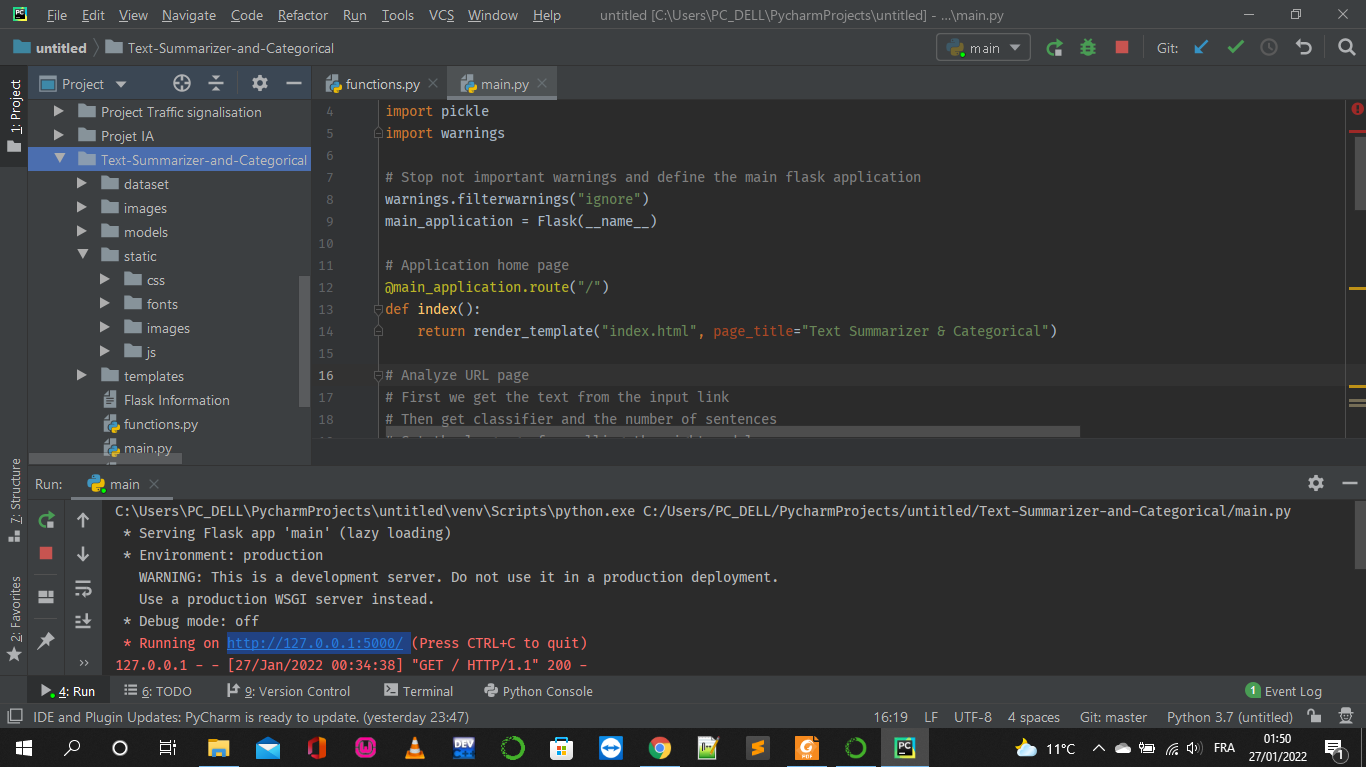

# Graphical User Interface
The graphical user interface (GUI) is the point of human-computer interaction and communication in a device. This can include display screens, keyboards, a mouse and the appearance of a desktop. It is also the way through which a user interacts with an application or a website. The GUI of this application builded using web languages like  HTML, CSS ,javascrip and Flask Framework and this is how it look like:
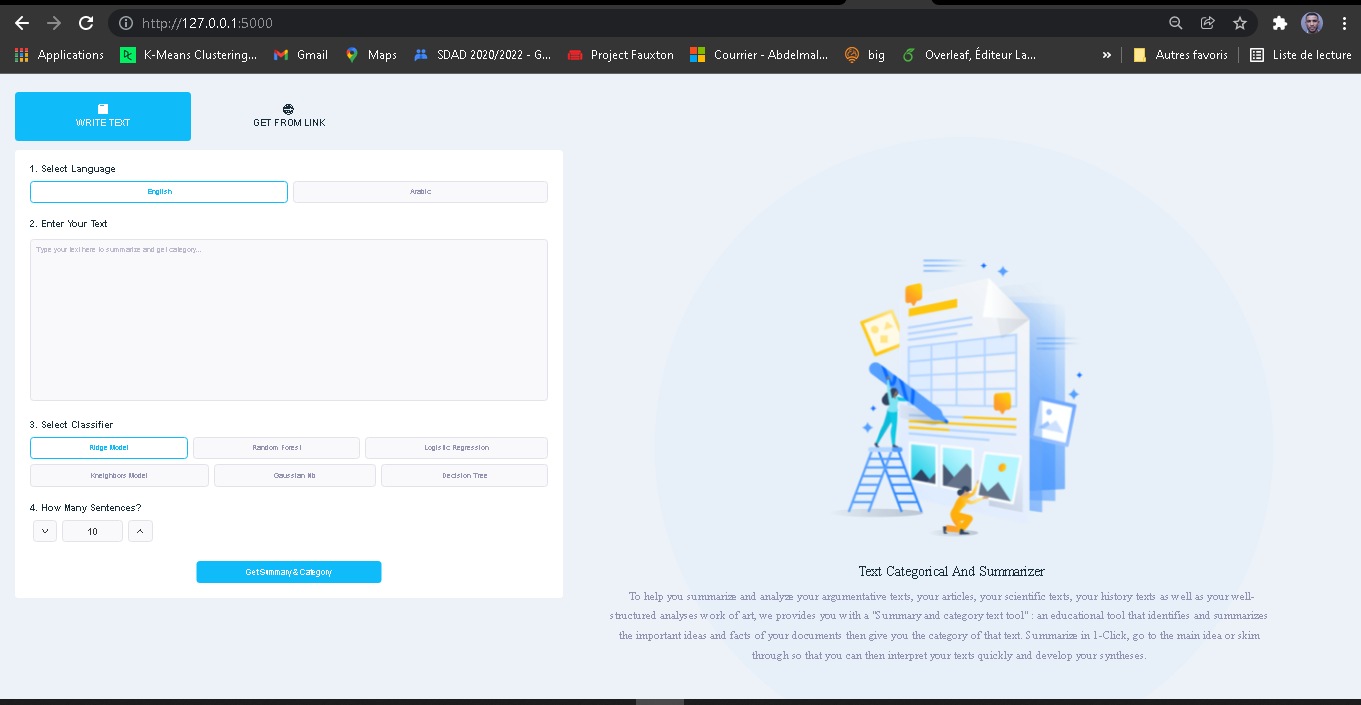

# Test the website
After reading the input text and the number of sentences from the user and getting the model name and the language, then pass that information to the main function that apply the text summarization and get the right category .


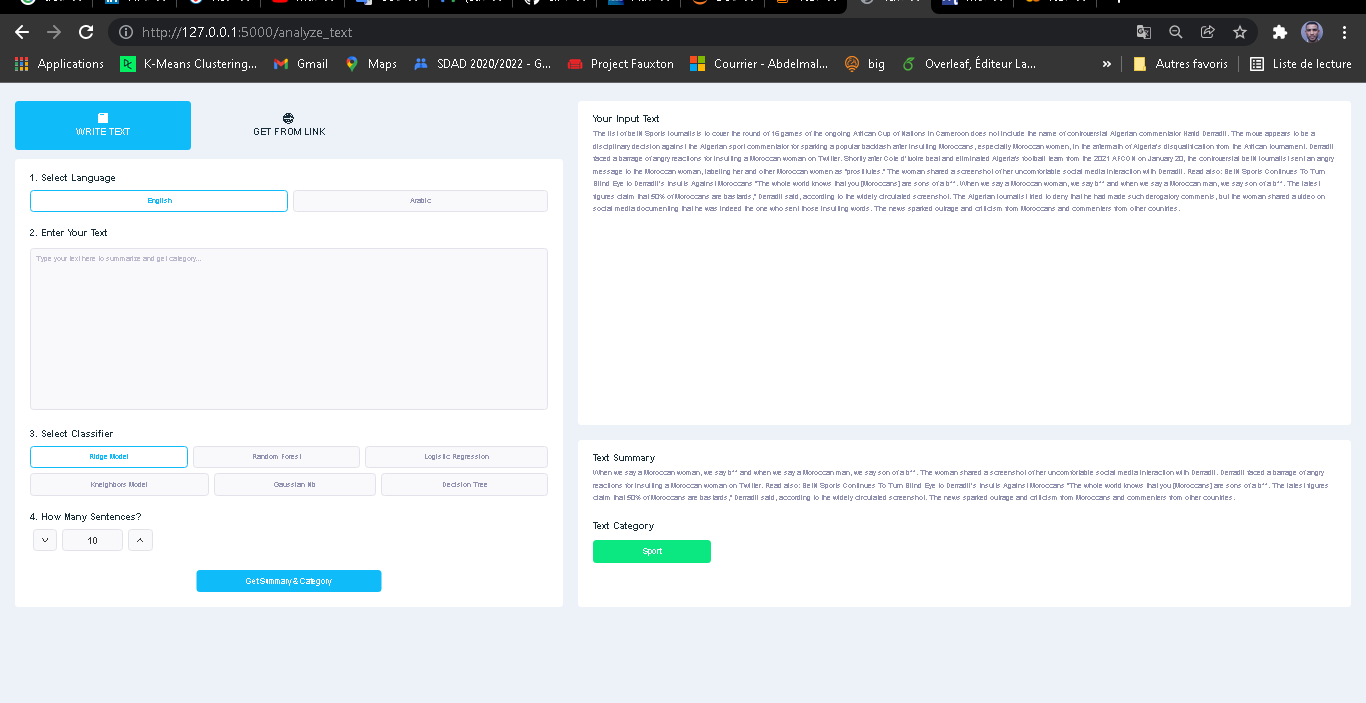